In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)


DATA_PATH = Path("Electric_Vehicle_Population_Data.csv")
df = pd.read_csv(DATA_PATH)

display(df.head())
df.info()
df.describe(include="all")

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,14.0,301024209,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
1,5YJSA1E49J,Yakima,Yakima,WA,98903.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.0,14.0,284102794,POINT (-120.47533 46.55702),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,Walla Walla,Walla Walla,WA,99362.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,16.0,205226556,POINT (-118.34261 46.07068),PACIFICORP,5.307192e+10
3,5UX43EU00S,King,Seattle,WA,98105.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,43.0,272398360,POINT (-122.31307 47.66127),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S05H,King,Enumclaw,WA,98022.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,31.0,123261582,POINT (-121.99136 47.20433),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269673 entries, 0 to 269672
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         269673 non-null  object 
 1   County                                             269662 non-null  object 
 2   City                                               269662 non-null  object 
 3   State                                              269673 non-null  object 
 4   Postal Code                                        269662 non-null  float64
 5   Model Year                                         269673 non-null  int64  
 6   Make                                               269673 non-null  object 
 7   Model                                              269673 non-null  object 
 8   Electric Vehicle Type                              269673 non-null  object

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,269673,269662,269662,269673,269662.000000,269673.000000,269673,269673,269673,269673,269669.000000,269009.000000,2.696730e+05,269584,269662,2.696620e+05
unique,16255,245,869,52,NaN,NaN,47,183,2,3,NaN,NaN,NaN,1081,77,NaN
top,7SAYGDEE7P,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,1195,133634,42191,269009,NaN,NaN,110635,56919,215138,168734,NaN,NaN,NaN,6566,96036,NaN
mean,NaN,NaN,NaN,NaN,98174.302260,2021.925832,NaN,NaN,NaN,NaN,40.751692,28.851436,2.434417e+08,NaN,NaN,5.297165e+10
std,NaN,NaN,NaN,NaN,2590.609215,3.050066,NaN,NaN,NaN,NaN,79.604176,14.894449,6.461834e+07,NaN,NaN,1.632722e+09
min,NaN,NaN,NaN,NaN,1030.000000,1999.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,4.385000e+03,NaN,NaN,1.001020e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2021.000000,NaN,NaN,NaN,NaN,0.000000,17.000000,2.190569e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98133.000000,2023.000000,NaN,NaN,NaN,NaN,0.000000,32.000000,2.610981e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98382.000000,2024.000000,NaN,NaN,NaN,NaN,33.000000,42.000000,2.768459e+08,NaN,NaN,5.305307e+10


In [6]:

missing_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)


df.columns = [c.strip().replace(" ", "_").replace("(", "").replace(")", "").lower() for c in df.columns]


for col in ["base_msrp", "electric_range"]:
    if col in df.columns:
        df[col] = df[col].replace(0, np.nan)


if {"model", "base_msrp"}.issubset(df.columns):
    df["base_msrp"] = df.groupby("model")["base_msrp"].transform(lambda s: s.fillna(s.median()))
if {"model", "electric_range"}.issubset(df.columns):
    df["electric_range"] = df.groupby("model")["electric_range"].transform(lambda s: s.fillna(s.median()))

Missing values per column:
 Legislative District                                 664
Vehicle Location                                      89
County                                                11
City                                                  11
Postal Code                                           11
Electric Utility                                      11
2020 Census Tract                                     11
Electric Range                                         4
VIN (1-10)                                             0
State                                                  0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
DOL Vehicle ID                                         0
dtype: int64


In [7]:
# Drop perfect duplicates
df = df.drop_duplicates()

# If VIN(1-10) present, de-duplicate on that key
vin_key = "vin_1-10" if "vin_1-10" in df.columns else "vin (1-10)"
if vin_key in df.columns:
    df = df.sort_values(by=[vin_key]).drop_duplicates(subset=[vin_key], keep="first").reset_index(drop=True)


In [8]:
# VIN anonymization
import hashlib

def hash_vin(v, salt="EV_WA_SALT"):
    if pd.isna(v):
        return np.nan
    return hashlib.sha256((salt + str(v)).encode()).hexdigest()[:12]

if vin_key in df.columns:
    df["vin_hash"] = df[vin_key].apply(hash_vin)

In [9]:
# Parse vehicle_location to lon/lat
if "vehicle_location" in df.columns:
    def parse_loc(x):
        if pd.isna(x): 
            return pd.Series({"lon": np.nan, "lat": np.nan})
        s = str(x).strip().replace("(", "").replace(")", "")
        parts = [p.strip() for p in s.split(",")]
        if len(parts) == 2:
            # Guess: first = lon, second = lat (common WA DOL format)
            try:
                lon, lat = float(parts[0]), float(parts[1])
                return pd.Series({"lon": lon, "lat": lat})
            except:
                return pd.Series({"lon": np.nan, "lat": np.nan})
        return pd.Series({"lon": np.nan, "lat": np.nan})

    loc_df = df["vehicle_location"].apply(parse_loc)
    df = pd.concat([df, loc_df], axis=1)
    df["lon"] = df["lon"].round(5)
    df["lat"] = df["lat"].round(5)

In [10]:
# Top 5 makes
top_makes = df["make"].value_counts().head(5)
print(top_makes)

# Top 5 models
top_models = df["model"].value_counts().head(5)
print(top_models)

make
TESLA        1704
VOLVO        1490
FORD         1321
AUDI         1254
CHEVROLET    1128
Name: count, dtype: int64
model
MODEL X           562
MODEL S           557
XC90              535
MUSTANG MACH-E    506
XC60              442
Name: count, dtype: int64


In [11]:
ev_by_county = df["county"].value_counts()
top_county = ev_by_county.idxmax()
print("Top county:", top_county)

Top county: King


In [12]:
ev_by_year = df["model_year"].value_counts().sort_index()
print(ev_by_year)

model_year
1999       2
2000       6
2002       1
2003       1
2008      11
2010      12
2011      39
2012     156
2013     260
2014     321
2015     362
2016     465
2017     561
2018     691
2019     741
2020     817
2021    1216
2022    1863
2023    2327
2024    2902
2025    2936
2026     565
Name: count, dtype: int64


In [13]:
# Count missing values per column
df.isnull().sum()

vin_1-10                                               0
county                                                 1
city                                                   1
state                                                  0
postal_code                                            1
model_year                                             0
make                                                   0
model                                                  0
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_cafv_eligibility        0
electric_range                                      6175
legislative_district                                  53
dol_vehicle_id                                         0
vehicle_location                                       8
electric_utility                                       1
2020_census_tract                                      1
vin_hash                                               0
lon                            

In [14]:
avg_range = df["electric_range"].dropna().mean()
print("Average electric range (miles):", round(avg_range, 2))

Average electric range (miles): 98.68


In [15]:
# Normalize CAFV entries to Yes/No
if "clean_alternative_fuel_vehicle_cafv_eligibility" in df.columns:
    cafv_col = "clean_alternative_fuel_vehicle_cafv_eligibility"
    eligible_mask = df[cafv_col].astype(str).str.lower().str.contains("eligible|true|yes")
    pct_eligible = 100 * eligible_mask.mean()
    print("CAFV eligible (%):", round(pct_eligible, 2))

CAFV eligible (%): 49.36


In [16]:
range_by_make = df.groupby("make")["electric_range"].mean().sort_values(ascending=False)
range_by_model = df.groupby("model")["electric_range"].mean().sort_values(ascending=False)

print(range_by_make.head(10))
print(range_by_model.head(10))

make
TESLA                   240.880193
JAGUAR                  234.000000
POLESTAR                233.000000
HYUNDAI                 134.216266
PORSCHE                 126.947750
AUDI                    114.088189
VOLKSWAGEN              106.882353
CHEVROLET               104.743185
NISSAN                  102.218750
WHEEGO ELECTRIC CARS    100.000000
Name: electric_range, dtype: float64
model
MACAN       305.377049
MODEL Y     291.000000
KONA        258.000000
BOLT EV     242.302439
MODEL X     241.637011
ROADSTER    235.740741
I-PACE      234.000000
PS2         233.000000
MODEL 3     229.709804
MODEL S     222.084381
Name: electric_range, dtype: float64


In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16255 entries, 0 to 16254
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   vin_1-10                                         16255 non-null  object 
 1   county                                           16254 non-null  object 
 2   city                                             16254 non-null  object 
 3   state                                            16255 non-null  object 
 4   postal_code                                      16254 non-null  float64
 5   model_year                                       16255 non-null  int64  
 6   make                                             16255 non-null  object 
 7   model                                            16255 non-null  object 
 8   electric_vehicle_type                            16255 non-null  object 
 9   clean_alternative_fuel_vehic

vin_1-10                                               0
county                                                 1
city                                                   1
state                                                  0
postal_code                                            1
model_year                                             0
make                                                   0
model                                                  0
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_cafv_eligibility        0
electric_range                                      6175
legislative_district                                  53
dol_vehicle_id                                         0
vehicle_location                                       8
electric_utility                                       1
2020_census_tract                                      1
vin_hash                                               0
lon                            

In [18]:
msrp_dict = {
    "MACAN": 75000,
    "MODEL Y": 55000,
    "KONA": 34000,
    "BOLT EV": 32000,
    "MODEL X": 95000,
    "ROADSTER": 200000,
    "I-PACE": 70000,
    "PS2": 48000,   # Polestar 2
    "MODEL 3": 42000,
    "MODEL S": 90000
}

In [19]:
df["base_msrp"] = df["model"].map(msrp_dict)

In [20]:
df["base_msrp"] = df["base_msrp"].fillna(df["base_msrp"].mean())

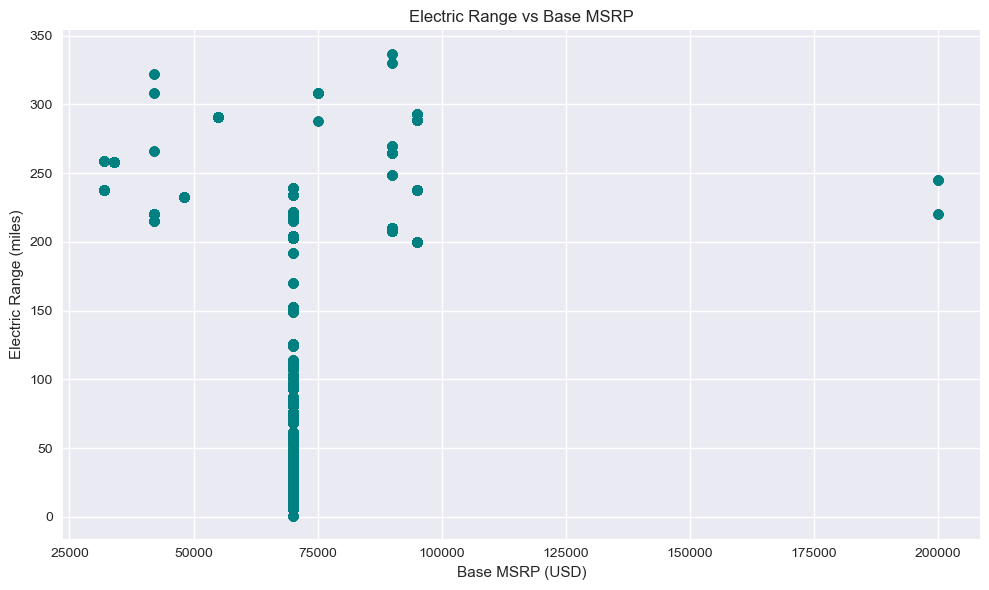

In [21]:
scatter_df = df[["electric_range", "base_msrp"]].dropna()

plt.scatter(scatter_df["base_msrp"], scatter_df["electric_range"],
            alpha=0.5, color="teal")
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Base MSRP (USD)")
plt.ylabel("Electric Range (miles)")
plt.tight_layout()
plt.show()

In [22]:
msrp_by_model = df.groupby("model")["electric_range"].mean().sort_values(ascending=False)
print(msrp_by_model.head(10))

model
MACAN       305.377049
MODEL Y     291.000000
KONA        258.000000
BOLT EV     242.302439
MODEL X     241.637011
ROADSTER    235.740741
I-PACE      234.000000
PS2         233.000000
MODEL 3     229.709804
MODEL S     222.084381
Name: electric_range, dtype: float64


In [23]:
print(df.columns.tolist())

['vin_1-10', 'county', 'city', 'state', 'postal_code', 'model_year', 'make', 'model', 'electric_vehicle_type', 'clean_alternative_fuel_vehicle_cafv_eligibility', 'electric_range', 'legislative_district', 'dol_vehicle_id', 'vehicle_location', 'electric_utility', '2020_census_tract', 'vin_hash', 'lon', 'lat', 'base_msrp']


In [24]:
# Simple proxy: top-10 cities vs rest
city_counts = df["city"].value_counts()
top10 = set(city_counts.head(10).index)
df["urban_proxy"] = df["city"].apply(lambda c: "Top10City" if c in top10 else "Other")
adoption_proxy = df["urban_proxy"].value_counts(normalize=True) * 100
print(adoption_proxy)

urban_proxy
Other        55.767456
Top10City    44.232544
Name: proportion, dtype: float64


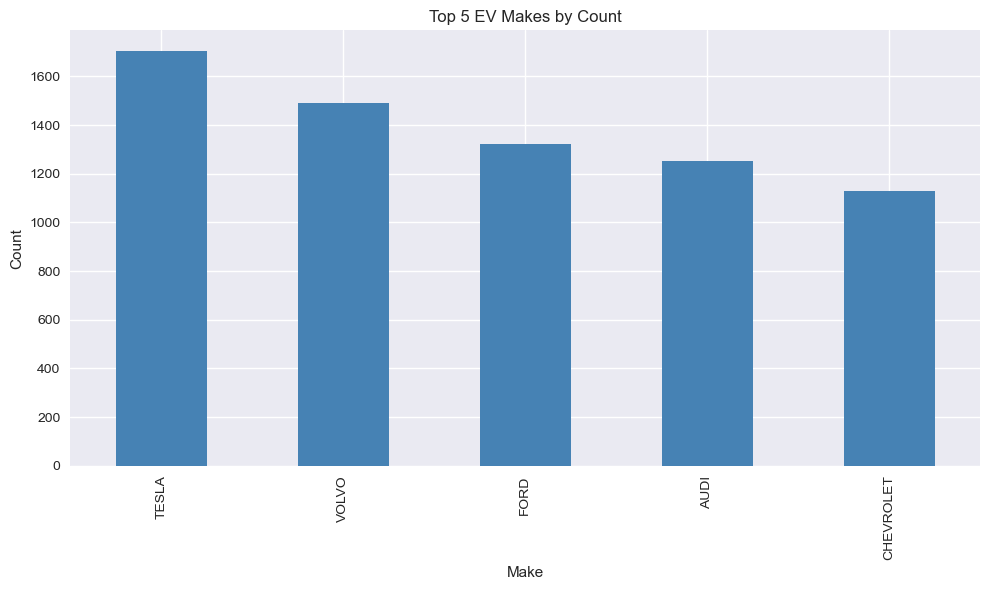

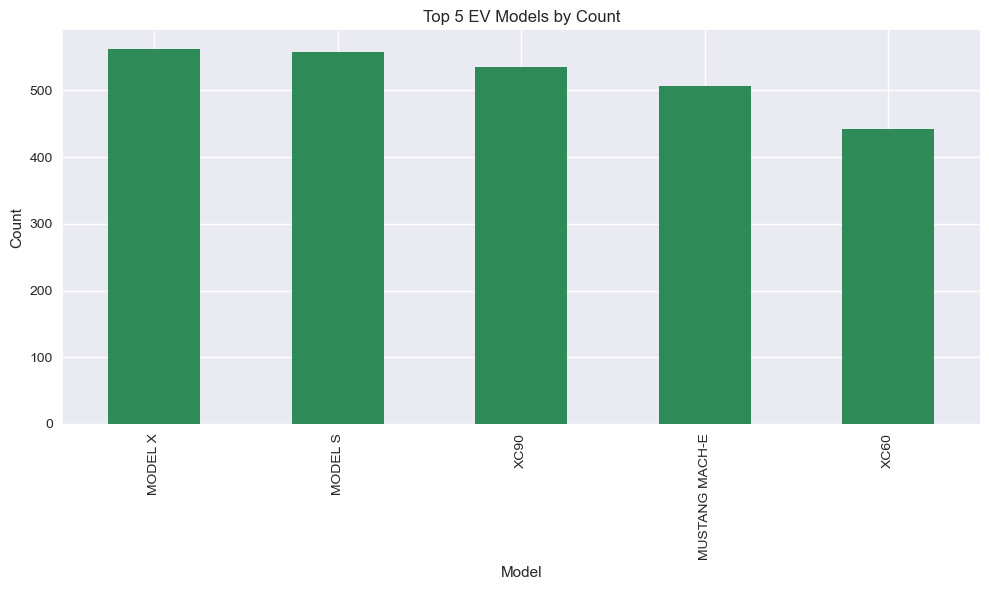

In [25]:
# Top 5 makes
top_makes.plot(kind="bar", color="steelblue")
plt.title("Top 5 EV Makes by Count")
plt.xlabel("Make"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# Top 5 models
top_models.plot(kind="bar", color="seagreen")
plt.title("Top 5 EV Models by Count")
plt.xlabel("Model"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

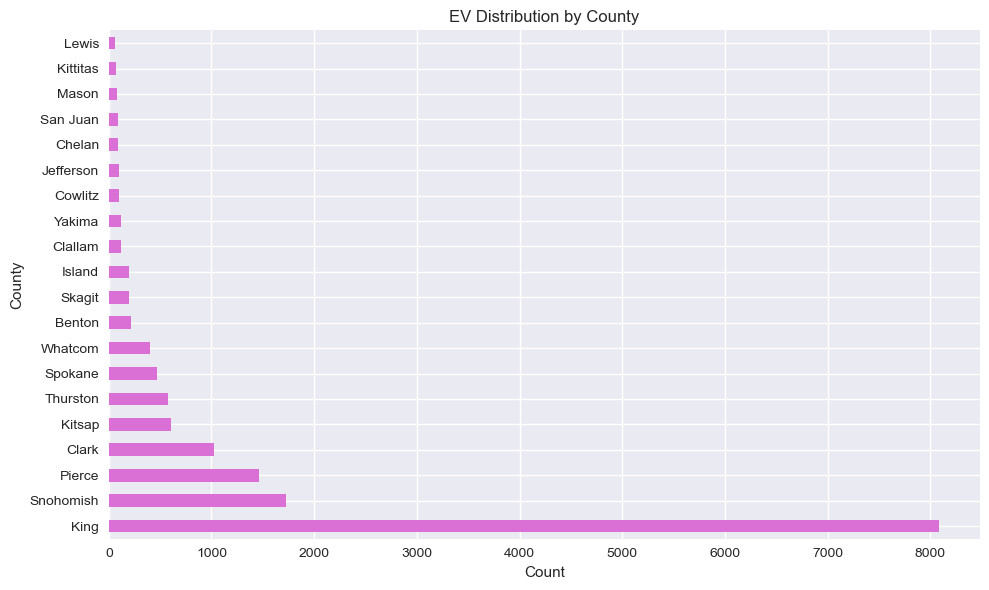

In [26]:
ev_by_county.head(20).plot(kind="barh", color="orchid")
plt.title("EV Distribution by County")
plt.xlabel("Count"); plt.ylabel("County")
plt.tight_layout(); plt.show()

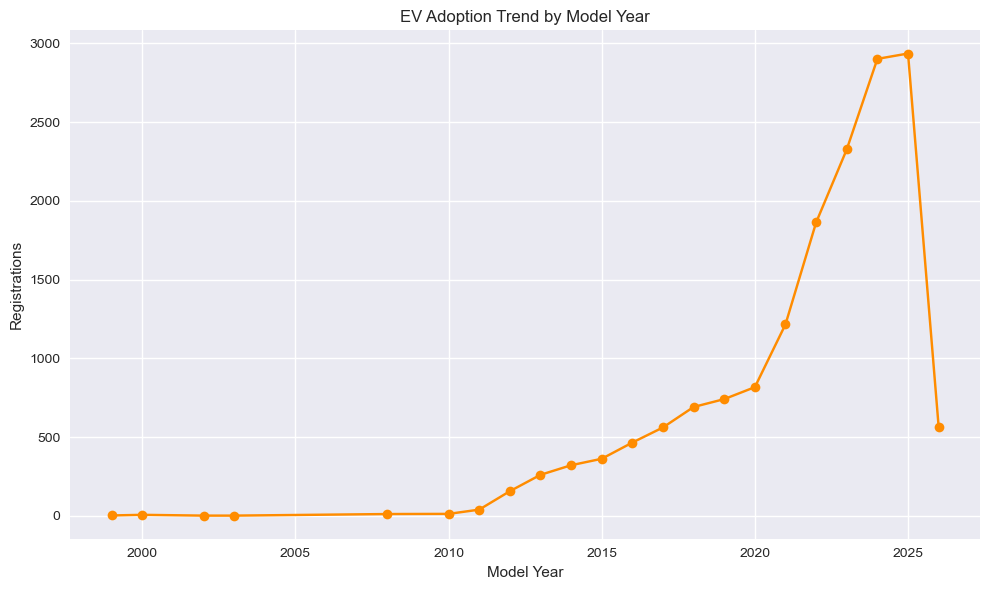

In [27]:
ev_by_year.plot(kind="line", marker="o", color="darkorange")
plt.title("EV Adoption Trend by Model Year")
plt.xlabel("Model Year"); plt.ylabel("Registrations")
plt.grid(True); plt.tight_layout(); plt.show()

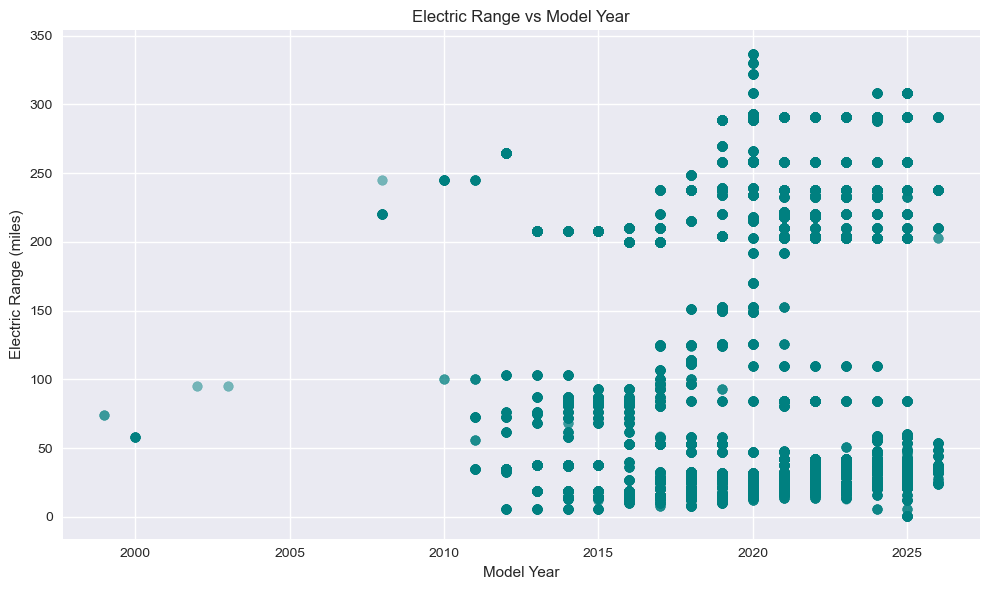

In [28]:
scatter_df = df[["model_year", "electric_range"]].dropna()

plt.scatter(scatter_df["model_year"], scatter_df["electric_range"],
            alpha=0.5, color="teal")
plt.title("Electric Range vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.tight_layout()
plt.show()

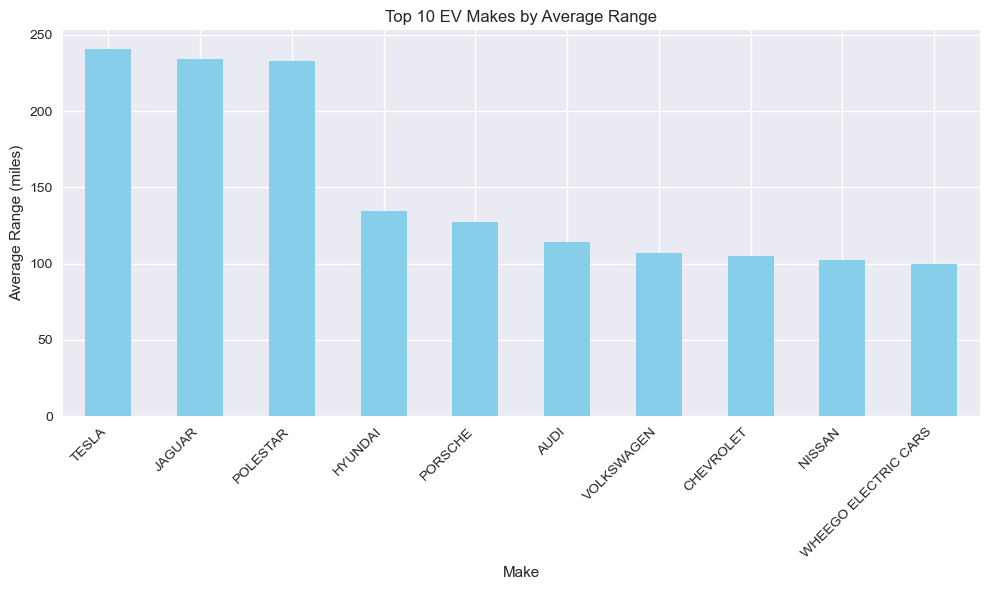

In [29]:
range_by_make = df.groupby("make")["electric_range"].mean().sort_values(ascending=False).head(10)

range_by_make.plot(kind="bar", color="skyblue")
plt.title("Top 10 EV Makes by Average Range")
plt.xlabel("Make")
plt.ylabel("Average Range (miles)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

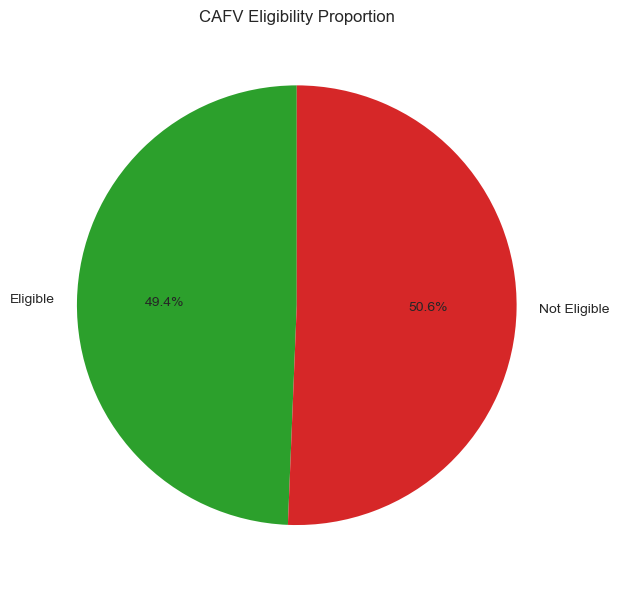

In [30]:
labels = ["Eligible", "Not Eligible"]
sizes = [eligible_mask.sum(), (~eligible_mask).sum()]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=["#2ca02c", "#d62728"], startangle=90)
plt.title("CAFV Eligibility Proportion")
plt.tight_layout(); plt.show()

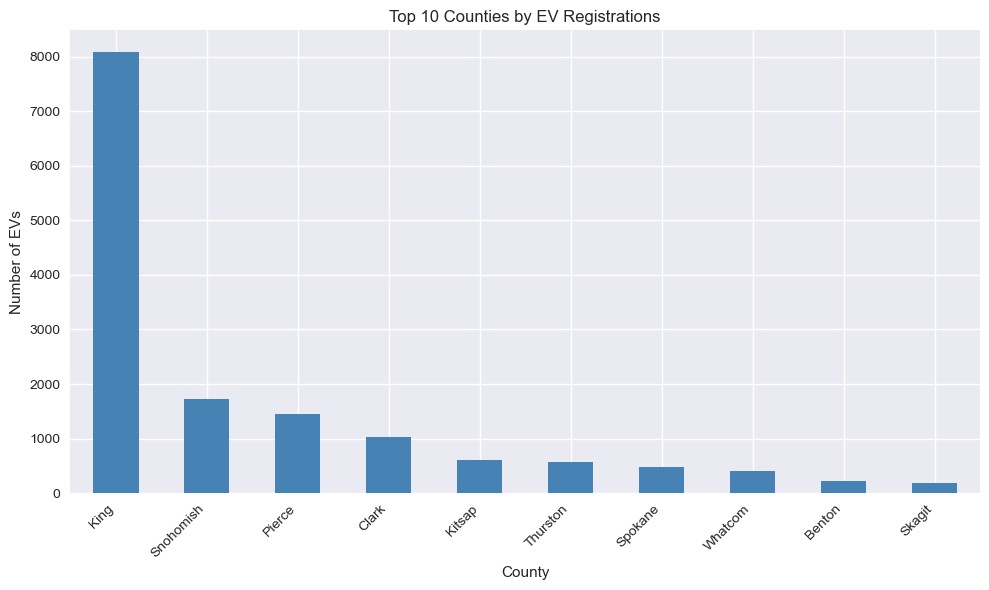

In [31]:
ev_by_county = df["county"].value_counts().head(10)

ev_by_county.plot(kind="bar", color="steelblue")
plt.title("Top 10 Counties by EV Registrations")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

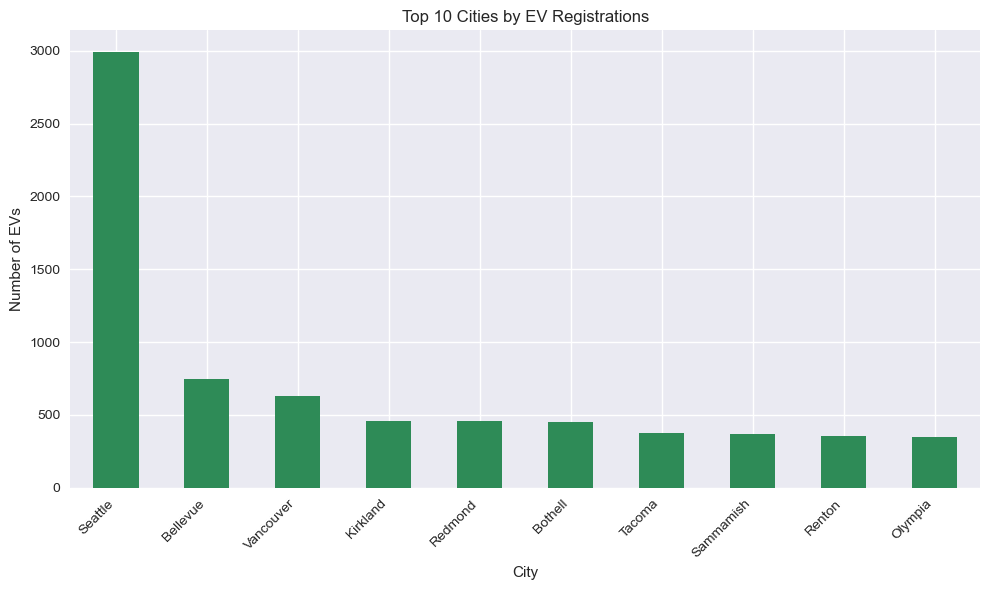

In [32]:
ev_by_city = df["city"].value_counts().head(10)

ev_by_city.plot(kind="bar", color="seagreen")
plt.title("Top 10 Cities by EV Registrations")
plt.xlabel("City")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [33]:
print(df["vehicle_location"].dropna().head(10))

0    POINT (-123.10367 48.07965)
1    POINT (-119.26844 46.31484)
2    POINT (-122.44718 47.20144)
3    POINT (-122.02054 47.60326)
4    POINT (-122.27427 47.43405)
5     POINT (-120.65754 47.5982)
6    POINT (-122.65107 47.27375)
7    POINT (-122.32863 47.46233)
8    POINT (-122.60735 46.94239)
9    POINT (-122.27427 47.43405)
Name: vehicle_location, dtype: object


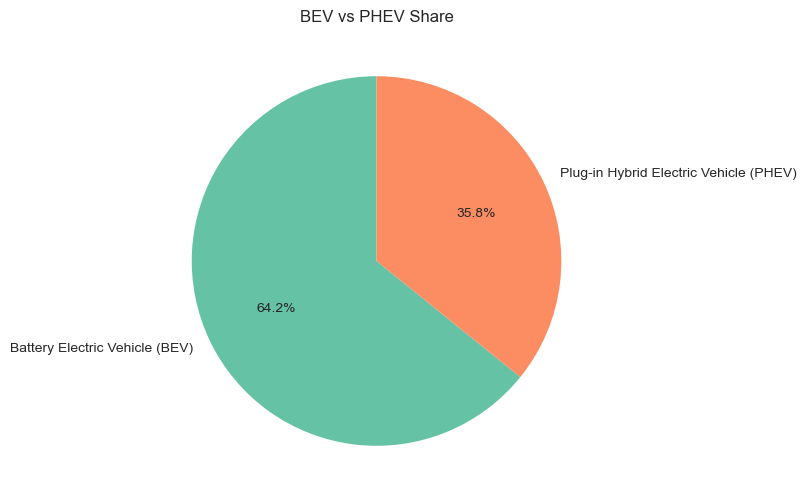

In [35]:
# BEV vs PHEV
ev_type_counts = df['electric_vehicle_type'].value_counts()

plt.figure(figsize=(6,6))
ev_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["#66c2a5","#fc8d62"])
plt.title("BEV vs PHEV Share")
plt.ylabel("")
plt.show()

In [38]:
# Generate predictions
y_pred = pipe.predict(X_test)

# Import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"R^2: {r2:.3f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

R^2: 0.945, MAE: 12.20, RMSE: 22.33


In [41]:
comparison = pd.DataFrame({
    "Actual Range": y_test.values[:10],
    "Predicted Range": y_pred[:10]
})
print(comparison)

   Actual Range  Predicted Range
0          35.0        26.305795
1          21.0        22.988790
2          84.0        99.234126
3         289.0       239.303632
4         208.0       218.389991
5          31.0        33.711009
6          25.0        28.445887
7         203.0       199.857895
8         259.0       240.773204
9          41.0        34.936693


In [39]:
# Extract coefficients for numeric features
lin = pipe.named_steps["lr"]
# Get transformed feature names
ohe = pipe.named_steps["prep"].named_transformers_["cat"]
cat_feature_names = list(ohe.get_feature_names_out(cat_cols)) if cat_cols else []
feature_names = num_cols + cat_feature_names

coefs = pd.Series(lin.coef_, index=feature_names).sort_values(key=abs, ascending=False)
print("Top coefficients influencing range:\n", coefs.head(10))

# Specifically MSRP coefficient (if present in num_cols)
if "base_msrp" in num_cols:
    print("MSRP coefficient:", coefs["base_msrp"])

Top coefficients influencing range:
 model_MACAN               121.753495
make_TESLA                104.808977
model_KONA                 99.318380
model_BOLT EV              86.249253
model_E-TRON SPORTBACK     65.632911
model_SPARK               -64.353047
make_SMART                -59.957515
model_E-TRON               59.427582
model_CAYENNE             -58.377837
make_JAGUAR                57.964638
dtype: float64
MSRP coefficient: -0.0003638342390501643


In [40]:
# Example: log MSRP feature
if "base_msrp" in X.columns:
    X["log_msrp"] = np.log1p(X["base_msrp"])

In [43]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, validate=True)

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("log_msrp", log_transformer)
        ]), ["base_msrp"]),
        ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=10), cat_cols)
    ]
)

In [44]:
print(X[["base_msrp", "log_msrp"]].head())

      base_msrp   log_msrp
0  69936.801376  11.155362
1  69936.801376  11.155362
2  69936.801376  11.155362
3  69936.801376  11.155362
4  69936.801376  11.155362
